In [1]:
%load_ext autoreload
%autoreload 2
    
import sys
sys.path.append("../src/")

import pandas as pd
from datasets import Dataset
from utils.data.dataproc import add_row_index, indcomp, rollout_to_prefs, annot_to_prefs
# from utils.eval.rewards import annot_proc
import matplotlib.pyplot as plt

/u/prasanns/miniconda3/envs/fixenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from utils.eval.rewards import paraphrase

In [30]:
paraphrase(["My name is john Answer: ..."])

[1.101315291832817]

In [18]:
newannots = pd.read_json("../outputs/results/rollouts/ultra/ppo_ultragolddpoplusfinal2.jsonl", orient='records', lines=True)

In [53]:
newannots['golds'] = newannots['rewards']
annotprefs = rollout_to_prefs(newannots)
filtprefs = annotprefs.filter(lambda ex: ex['magnitude']>0)
# filtprefs.save_to_disk("../outputs/data/ultra/dpopgoldannots")

(array([167., 202.,  94.,   0.,  22.,   9.,   0.,   5.,   4.,   1.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ]),
 <BarContainer object of 10 artists>)

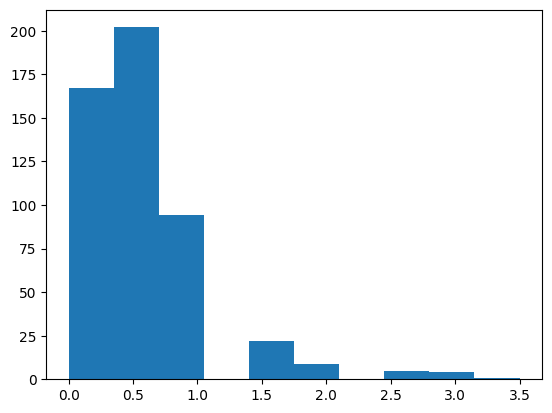

In [20]:
plt.hist(annotprefs['magnitude'])

In [60]:
evaldata = pd.read_json("../../rlhf-length-biases/annotation/u100_annotated.jsonl", orient='records', lines=True)
oodprefs = annot_to_prefs(evaldata)
print(len(oodprefs))
# oodprefs.save_to_disk("../outputs/data/ultra/ood100test")

197
